# Solving Probability Problem With Computation Power

# Problem

Implement a simulation that can assist to study the [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem). You may follow the link to learn more about it, but for this problem there changes:

Assume that birthdays of individuals are uniformly distributed over the 365 days in a year. Further, assume that the year is not a leap year, and that it begins on a Monday. We define a calendar week to be the seven days from Monday to Sunday. 

Suppose there are $n$ people in a room. How large does have $n$ have to be in order for the probability that there are at least 3 people with their birthdays within the same calendar week to be more than 0.5? You should include a visualisation in your answer.

### Answer:
It required at least 26 person in a room to get a probability of 0.5 for at least 3 people in the room with their birthdays within the same calender week.
Please refer to the Question 2 working step below for the visualisation of the probability vs n people in the room.

# Solution Working Steps


In [2]:
#import packages
from random import randint
import numpy as np
from numpy import random
from numpy.random import default_rng
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import statistics as st
%matplotlib inline
#np.random.seed(5003)
rng = np.random.default_rng(5003)

Given birth day (1 to 365) start from 1st Jan is Monday and non leap year. For example year 1st Jan 2018 is Monday and 31st Dec 2018 is Monday of Week 1 of year 2019. Therefore, there is only 52 full weeks for year 2018. The calculation is safe to equal random integer of 52 week.

In [4]:
#by iso8601, the 31 Dec 2018 is Week 1 of 2019
first_day_of_year = datetime(2018, 1, 1)
birthdays=datetime(2018, 12, 31)
print(birthdays)
print("Week No.=",birthdays.isocalendar()[1],"is a Weekday",birthdays.isoweekday(), 'of Year', birthdays.isocalendar()[0] )

2018-12-31 00:00:00
Week No.= 1 is a Weekday 1 of Year 2019


In [3]:
# Not required to allocate random day to week. Create a function for the random birth week of n_people, 
# def random_birth_week(n_people):
    #first_jan_monday = datetime(2018, 1, 1)
    #return [(first_jan_monday + timedelta(days=randint(0, 365))).isocalendar()[1] for _ in range(n_people)]

1 52 27.0 26.554
1 52 26.0 26.36175
1 52 26.0 26.36517


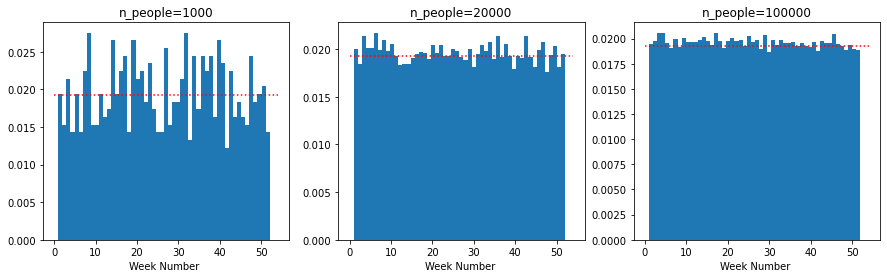

In [5]:
# To check a good number of people in sampling for a good uniform distribution over the random 52 full-weeks
# 100000 total people(loops) is better to represent the uniform distribution
# Use of 20000 runs shall be balance for low value of n_people and high value n_people in room

xpos=131
for i in (1000, 20000, 100000):
    weeks=rng.choice(np.arange(1,53),i).tolist()
    print(min(weeks), max(weeks), st.median(weeks), st.mean(weeks))
    plt.figure(1, figsize=(15, 4))
    plt.subplot(xpos)
    plt.hlines((1/52), 0, 54, colors='r',linestyles='dotted')
    plt.hist(weeks, density=True, bins=52)
    plt.title(f'n_people={i}')
    plt.xlabel('Week Number ');
    xpos+=1

In [6]:
# Calculate the probality of n_people with same calender week
# Considering there is a need more than n_people to get the probability of 0.5,
# if n_poeple > 10, the total people of birth weeek is (n_people * runs)>200000 samples

def probability(n_people, runs=20000):
    triple_found = 0
    for _ in range(runs):
        weeks=rng.choice(np.arange(1,53),n_people).tolist()
        triple = set(x for x in weeks if weeks.count(x) > 2)
        if len(triple) >= 1:
            triple_found += 1

    return triple_found/runs #probability

In [7]:
# check the runs' time and the possible probability
%time print(probability(10))
%time print(probability(25))
%time print(probability(50))

0.0395
Wall time: 357 ms
0.4958
Wall time: 482 ms
0.995
Wall time: 891 ms


In [8]:
# To loop the number of people from 3 to 100 in a room needed to obtain probability of 0.5
# Note: This will take 15 to 20 seconds
for n_people1 in range(3,100):
    proba=probability(n_people1)
    if proba>0.5:   #if the probablity more than 0.5 stop and print n_people
        break
print(f'{n_people1} random people are needed in a room,to obtain the probability at least 3 people with their birthdays within the same calendar week to be more than 0.5.')

26 random people are needed in a room,to obtain the probability at least 3 people with their birthdays within the same calendar week to be more than 0.5.


In [9]:
#Generate a data of n_people vs probality to plot a line chart
probability_run = []
number_people=[]
for n_people in range(3,100):
    proba=probability(n_people)
    probability_run.append(proba)
    number_people.append(n_people)
    print(f'{n_people} people in a room, the probability is {proba:0.3f}')
    if (len(probability_run)>50):
        if (proba-probability_run[-3])<0.00001:
            break
    
#print(probability_run)
#print(number_people)

3 people in a room, the probability is 0.000
4 people in a room, the probability is 0.002
5 people in a room, the probability is 0.004
6 people in a room, the probability is 0.007
7 people in a room, the probability is 0.012
8 people in a room, the probability is 0.019
9 people in a room, the probability is 0.028
10 people in a room, the probability is 0.040
11 people in a room, the probability is 0.052
12 people in a room, the probability is 0.067
13 people in a room, the probability is 0.087
14 people in a room, the probability is 0.112
15 people in a room, the probability is 0.136
16 people in a room, the probability is 0.164
17 people in a room, the probability is 0.195
18 people in a room, the probability is 0.219
19 people in a room, the probability is 0.262
20 people in a room, the probability is 0.297
21 people in a room, the probability is 0.327
22 people in a room, the probability is 0.372
23 people in a room, the probability is 0.409
24 people in a room, the probability is 0

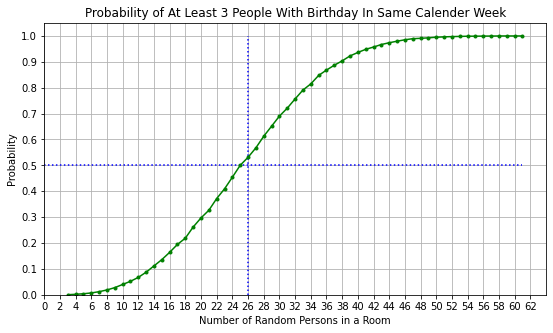

In [10]:
# Graph for visulisation of 'Probability of at least 3 have same birth week' to 'number of people in a room'
plt.figure(figsize=(9, 5))
ax=plt.plot(number_people, probability_run,'go-',markersize=3)
plt.grid()
plt.xticks(np.arange(0, max(number_people)+2, 2.0))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.hlines(0.5, 0, number_people[-1], colors='b',linestyles='dotted')
plt.vlines(n_people1, 0, probability_run[-5], colors='b',linestyles='dotted')
plt.xlabel('Number of Random Persons in a Room')
plt.ylabel('Probability')
plt.title('Probability of At Least 3 People With Birthday In Same Calender Week')
plt.xlim(left=0), plt.ylim(bottom=0);